<center>
<h1>NFL Data Analysis</h1>
<h3>This is part 2 in a 2 Notebook excercise in leveraging Spark to perform simple Data Engineering and Analysis using NFL Data provided by "Burnt Sushi".</h3>

<img src="https://github.com/bradenrc/nfl_spark/raw/master/intro2.png" style="width:60%;height:60%"/>

</center>

In [1]:
games_norm_df = sqlContext.read.parquet("./games_norm_df_p/")
games_norm_df.registerTempTable("games")

distinct_games_weather_df = sqlContext.read.parquet("./weather_p/")
distinct_games_weather_df.registerTempTable("weather")

Py4JJavaError: An error occurred while calling o40.parquet.
: java.lang.AssertionError: assertion failed: No predefined schema found, and no Parquet data files or summary files found under .
	at scala.Predef$.assert(Predef.scala:179)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetRelation$MetadataCache.org$apache$spark$sql$execution$datasources$parquet$ParquetRelation$MetadataCache$$readSchema(ParquetRelation.scala:512)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetRelation$MetadataCache$$anonfun$12.apply(ParquetRelation.scala:421)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetRelation$MetadataCache$$anonfun$12.apply(ParquetRelation.scala:421)
	at scala.Option.orElse(Option.scala:257)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetRelation$MetadataCache.refresh(ParquetRelation.scala:421)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetRelation.org$apache$spark$sql$execution$datasources$parquet$ParquetRelation$$metadataCache$lzycompute(ParquetRelation.scala:145)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetRelation.org$apache$spark$sql$execution$datasources$parquet$ParquetRelation$$metadataCache(ParquetRelation.scala:143)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetRelation$$anonfun$6.apply(ParquetRelation.scala:202)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetRelation$$anonfun$6.apply(ParquetRelation.scala:202)
	at scala.Option.getOrElse(Option.scala:120)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetRelation.dataSchema(ParquetRelation.scala:202)
	at org.apache.spark.sql.sources.HadoopFsRelation.schema$lzycompute(interfaces.scala:636)
	at org.apache.spark.sql.sources.HadoopFsRelation.schema(interfaces.scala:635)
	at org.apache.spark.sql.execution.datasources.LogicalRelation.<init>(LogicalRelation.scala:37)
	at org.apache.spark.sql.SQLContext.baseRelationToDataFrame(SQLContext.scala:442)
	at org.apache.spark.sql.DataFrameReader.parquet(DataFrameReader.scala:316)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:55)
	at java.lang.reflect.Method.invoke(Method.java:507)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:785)


<h3>Incoroporate all of the data from Burnt Sushi NFLDB</h3>

In [2]:
connection_d = {'url':'jdbc:postgresql://bluemix-sandbox-dal-9-portal.2.dblayer.com:15656/compose',
                'dbtable':'play_player',
                'user':'admin',
                'password':'RFSUPYGYXCMNKGUN'}  

connection_d["dbtable"] = "drive"
drive_df = sqlContext.read.format('jdbc').options(**connection_d).load()
drive_df.registerTempTable("drive")

connection_d["dbtable"] = "play"
play_df = sqlContext.read.format('jdbc').options(**connection_d).load()
play_df.registerTempTable("play")

connection_d["dbtable"] = "team"
team_df = sqlContext.read.format('jdbc').options(**connection_d).load()
team_df.registerTempTable("team")

connection_d["dbtable"] = "player"
player_df = sqlContext.read.format('jdbc').options(**connection_d).load()
player_df.registerTempTable("player")

connection_d["dbtable"] = "play_player"
play_player_df = sqlContext.read.format('jdbc').options(**connection_d).load()
play_player_df.registerTempTable("play_player")

Grab the counts of each table

In [3]:
print "Games: ", games_norm_df.count()
print "Weather (distinct games): ", distinct_games_weather_df.count()
print "Drives: ", drive_df.count()
print "Player Plays: ", play_player_df.count()
print "Plays: ", play_df.count()
print "Players: ", player_df.count()
print "Teams:: ", team_df.count()

Games:  5276
Weather (distinct games):  2630
Drives:  57914
Player Plays:  956777
Plays:  432606
Players:  7451
Teams::  35


Print out the schema of each table

In [4]:
print "Games: ", games_norm_df.printSchema()
print "Weather (distinct games): ", distinct_games_weather_df.printSchema()
print "Drives: ", drive_df.printSchema()
print "Player Plays: ", play_player_df.printSchema()
print "Plays: ", play_df.printSchema()
print "Players: ", player_df.printSchema()
print "Teams:: ", team_df.printSchema()

Games:  root
 |-- GSIS_ID: string (nullable = false)
 |-- GAMEKEY: string (nullable = true)
 |-- START_TIME: timestamp (nullable = false)
 |-- WEEK: integer (nullable = false)
 |-- DAY_OF_WEEK: string (nullable = false)
 |-- SEASON_YEAR: integer (nullable = false)
 |-- SEASON_TYPE: string (nullable = false)
 |-- FINISHED: boolean (nullable = false)
 |-- LOCATION: string (nullable = false)
 |-- HOME_GAME: integer (nullable = false)
 |-- TEAM: string (nullable = false)
 |-- SCORE: integer (nullable = false)
 |-- SCORE_Q1: integer (nullable = true)
 |-- SCORE_Q2: integer (nullable = true)
 |-- SCORE_Q3: integer (nullable = true)
 |-- SCORE_Q4: integer (nullable = true)
 |-- SCORE_Q5: integer (nullable = true)
 |-- TURNOVERS: integer (nullable = false)
 |-- OPPONENT_TEAM: string (nullable = false)
 |-- OPPONENT_SCORE: integer (nullable = false)
 |-- OPPONENT_SCORE_Q1: integer (nullable = true)
 |-- OPPONENT_SCORE_Q2: integer (nullable = true)
 |-- OPPONENT_SCORE_Q3: integer (nullable = tru

<h3>Visualize One Game (Eli Manning September 5th 2012)</h3>

In [5]:
#example of one game for Eli Manning

query = """
select
    pp.PLAY_ID,
    PASSING_YDS
from games g

INNER JOIN drive d on
    g.GSIS_ID = d.GSIS_ID

INNER JOIN play_player pp on
    g.GSIS_ID = pp.GSIS_ID
    and pp.DRIVE_ID = d.DRIVE_ID

INNER JOIN player p on
    p.PLAYER_ID = pp.PLAYER_ID
    and g.TEAM = p.TEAM

where g.GSIS_ID = 2012090500
        and p.FULL_NAME = 'Eli Manning'
order by 
    g.GSIS_ID,
    d.DRIVE_ID,
    p.PLAYER_ID,
    pp.PLAY_ID """

plays_manning_df = sqlContext.sql(query)
plays_manning_pd = plays_manning_df.toPandas()

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

Example 1 uses Pandas and matplotlib

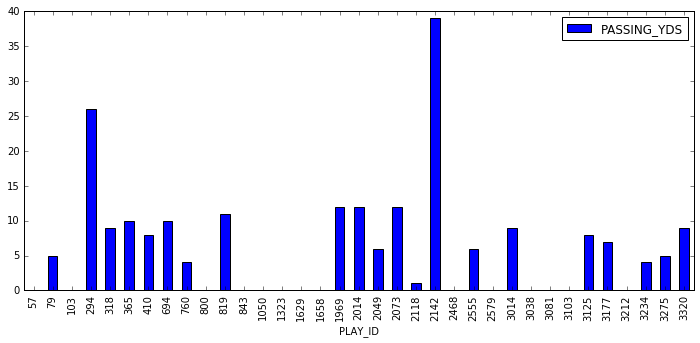

In [7]:
plays_manning_pd.plot(kind='bar', x='PLAY_ID', y='PASSING_YDS', figsize=(12, 5))

Example 2 uses the Brunel library<br>
More details here: <a href: http://brunel.mybluemix.net/docs/>http://brunel.mybluemix.net/docs/</a>

In [12]:
#Since it is supported natively, there is nothing to install just reference your Pandas Datafram
import brunel
%brunel data('plays_manning_pd') bar x(PLAY_ID) y(PASSING_YDS) :: width=800, height=500

<IPython.core.display.Javascript object>

<h4>The same game, but "rolling sum" to show the progressive yards gained by Eli during the game</h4>

In [13]:
#Rolling sum to show the progression of the game

plays_manning_df.registerTempTable("manning")

query = """
select
    a.PLAY_ID,
    a.PASSING_YDS,
    sum(b.PASSING_YDS) as Total_Yards
from
 manning a
inner join manning b
    on a.PLAY_ID >= b.PLAY_ID
GROUP BY
    a.PLAY_ID, a.PASSING_YDS
order by
    a.PLAY_ID desc
"""
pd = sqlContext.sql(query).toPandas()

In [14]:
%brunel data('pd') bar x(PLAY_ID) y(Total_Yards) :: width=800, height=500

<IPython.core.display.Javascript object>

Using joins to the other tables created, you can determine the most passing yards by player

In [15]:
#Who has the most passing yards in the record set (top 15)
query = """
SELECT 
	player.FULL_NAME, 
	SUM(play_player.PASSING_YDS) AS passing_yds
FROM play_player
INNER JOIN player ON 
    player.PLAYER_ID = play_player.PLAYER_ID
INNER JOIN games ON 
    games.GSIS_ID = play_player.GSIS_ID
    and games.TEAM = player.TEAM
WHERE 
	games.season_type = 'Regular'
	AND PASSING_YDS > 0
GROUP BY player.FULL_NAME
ORDER BY SUM(play_player.PASSING_YDS) desc
limit 15
"""

pd = sqlContext.sql(query).toPandas()

In [16]:
%brunel data('pd') bar x(FULL_NAME) y(passing_yds) color(FULL_NAME)  transpose :: width=800, height=500

<IPython.core.display.Javascript object>

We can also determine most passing yards by team, with a count of Quarterbacks who played

In [17]:
#what about the team with the most passing yards
query = """
SELECT 
	player.TEAM, 
	SUM(play_player.PASSING_YDS) AS passing_yds,
    COUNT(distinct player.FULL_NAME) as players
FROM play_player
INNER JOIN player ON 
    player.PLAYER_ID = play_player.PLAYER_ID
INNER JOIN games ON 
    games.GSIS_ID = play_player.GSIS_ID
    and games.TEAM = player.TEAM
WHERE 
	games.season_type = 'Regular'
	AND PASSING_YDS > 0
GROUP BY player.TEAM
ORDER BY SUM(play_player.PASSING_YDS) desc
limit 15
"""
pd = sqlContext.sql(query).toPandas()

In [18]:
pd

TEAM  passing_yds  players
0    NO        36590        2
1    NE        33217        4
2    SD        32679        2
3   ATL        31247        2
4   NYG        31217        3
5   PIT        30511        6
6    GB        29010        1
7   DET        27700        3
8   BAL        27435        3
9   DAL        26551        4
10  CHI        24080        2
11  CAR        20614        2
12  CIN        20258        2
13  MIA        19613        3
14  IND        16382        1

In [19]:
#pd.plot(kind='barh', stacked=True, y='passing_yds', x="TEAM", figsize=(14, 8))
%brunel data('pd') bar x(TEAM) y(passing_yds) color(TEAM)  transpose + data('pd') line x(TEAM) y(players) transpose :: width=800, height=500 

<IPython.core.display.Javascript object>

<h3>Incorporate weather and compare the weather to the yards thrown by quarterback</h3>

In [20]:
import json
#the weather table has a column that contains all of the JSON returned for each day\locaton queried 
#in most cases we are only interested in some basic observations, so the first step is to pull those out

#We can build a function to pull out the value that we want and return the metric

#here is an example of the data we are working with:

example_data = distinct_games_weather_df.take(1)

for rrow in example_data:
    #let's just pick the 12th value assuming that roughly the middle of the day is sufficienct
    #for the analysis
    print json.dumps(rrow.weather["observations"][12], sort_keys=True, indent=4, separators=(',', ': '))
    print "*" * 20

    #or to see a specific value
    print rrow.weather["observations"][12]["temp"]
    print "*" * 20

{
    "blunt_phrase": null,
    "class": null,
    "clds": null,
    "day_ind": null,
    "dewPt": 37,
    "expire_time_gmt": 1419765300,
    "feels_like": 46,
    "gust": null,
    "heat_index": 46,
    "icon_extd": 2600,
    "key": null,
    "max_temp": null,
    "min_temp": null,
    "obs_id": null,
    "obs_name": null,
    "precip_hrly": 0,
    "precip_total": null,
    "pressure": null,
    "pressure_desc": null,
    "pressure_tend": null,
    "primary_swell_direction": null,
    "primary_swell_height": null,
    "primary_swell_period": null,
    "primary_wave_height": null,
    "primary_wave_period": null,
    "qualifier": null,
    "qualifier_svrty": null,
    "rh": 71,
    "secondary_swell_direction": null,
    "secondary_swell_height": null,
    "secondary_swell_period": null,
    "snow_hrly": null,
    "temp": 46,
    "terse_phrase": null,
    "uv_desc": null,
    "uv_index": 0,
    "valid_time_gmt": 1419758100,
    "vis": 10,
    "water_temp": null,
    "wc": 46,
    "wdir"

In [21]:
#now create a function that takes the JSON blob and returns a value
import types

def get_w_metric(metric, datablob):
    i = 10
    try:
        for obs in datablob["observations"][11:20]:
            if obs[metric]: 
                #return obs[metric]
                return str(obs[metric])
    except:
        return 'na'

sqlContext.registerFunction("get_w_metric", get_w_metric)

In [22]:
#test the function

query = "select *, get_w_metric('temp', weather) as temp from weather  limit 10"
sqlContext.sql(query).show()

+----------+--------+--------------------+--------+--------+---------+------------+--------------------+----+
|   GSIS_ID|LOCATION|          START_TIME| datekey|latitude|longitude|stadium_city|             weather|temp|
+----------+--------+--------------------+--------+--------+---------+------------+--------------------+----+
|2014122812|     WAS|2014-12-28 12:00:...|20141228|  38.908|  -76.864|Landover, MD|Map(metadata -> n...|  41|
|2015082051|     WAS|2015-08-20 18:30:...|20150820|  38.908|  -76.864|Landover, MD|Map(metadata -> n...|  77|
|2015120700|     WAS|2015-12-07 19:30:...|20151207|  38.908|  -76.864|Landover, MD|Map(metadata -> n...|  34|
|2009082850|     WAS|2009-08-28 19:00:...|20090828|  38.908|  -76.864|Landover, MD|Map(metadata -> n...|  73|
|2009092008|     WAS|2009-09-20 12:00:...|20090920|  38.908|  -76.864|Landover, MD|Map(metadata -> n...|  52|
|2014120708|     WAS|2014-12-07 12:00:...|20141207|  38.908|  -76.864|Landover, MD|Map(metadata -> n...|  39|
|201510250

In [23]:
#create a dataframe with weather metrics
query = """ select 
                *, 
                get_w_metric('temp', weather) as temp,
                get_w_metric('vis', weather) as vis,
                get_w_metric('precip_hrly', weather) as precip_hrly,
                get_w_metric('heat_index', weather) as heat_index,
                get_w_metric('wspd', weather) as wspd,
                get_w_metric('precip_total', weather) as precip_total,
                get_w_metric('pressure', weather) as pressure
        from weather """
distinct_games_weather_df_wmetrics = sqlContext.sql(query)
distinct_games_weather_df_wmetrics.registerTempTable("weather_metrics")

In [24]:
distinct_games_weather_df_wmetrics.show(5)

+----------+--------+--------------------+--------+--------+---------+------------+--------------------+----+---+-----------+----------+----+------------+--------+
|   GSIS_ID|LOCATION|          START_TIME| datekey|latitude|longitude|stadium_city|             weather|temp|vis|precip_hrly|heat_index|wspd|precip_total|pressure|
+----------+--------+--------------------+--------+--------+---------+------------+--------------------+----+---+-----------+----------+----+------------+--------+
|2014122812|     WAS|2014-12-28 12:00:...|20141228|  38.908|  -76.864|Landover, MD|Map(metadata -> n...|  41| 10|       null|        41|   3|        null|    null|
|2015082051|     WAS|2015-08-20 18:30:...|20150820|  38.908|  -76.864|Landover, MD|Map(metadata -> n...|  77| 10|       null|        78|   3|        null|    null|
|2015120700|     WAS|2015-12-07 19:30:...|20151207|  38.908|  -76.864|Landover, MD|Map(metadata -> n...|  34| 10|       null|        34|   3|        null|    null|
|2009082850|    

In [25]:
query = """

select 
    *
from
    games g
inner join weather_metrics w on
    g.GSIS_ID = w.GSIS_ID
limit 5
"""
sqlContext.sql(query).toPandas()

GSIS_ID GAMEKEY          START_TIME  WEEK DAY_OF_WEEK  SEASON_YEAR  \
0  2014122106   56403 2014-12-21 12:00:00    16      Sunday         2014   
1  2015102500   56595 2015-10-25 08:30:00     7      Sunday         2015   
2  2014122107   56404 2014-12-21 12:00:00    16      Sunday         2014   
3  2014122108   56405 2014-12-21 15:05:00    16      Sunday         2014   
4  2014122109   56406 2014-12-21 15:25:00    16      Sunday         2014   

  SEASON_TYPE FINISHED LOCATION  HOME_GAME    ...    longitude  \
0     Regular     True      PIT          0    ...      -80.016   
1     Regular     True      JAC          0    ...      -81.638   
2     Regular     True       TB          0    ...      -82.503   
3     Regular     True      STL          0    ...      -118.28   
4     Regular     True      DAL          0    ...      -97.093   

       stadium_city                                            weather  temp  \
0    Pittsburgh, PA  {u'observations': [{u'primary_wave_period': No...    29   
1  Jacksonville, FL  {u'observations': [{u'primary_wave_period': No...    81   
2         Tampa, FL  {u'observations': [{u'primary_wave_period': No...    76   
3   Los Angeles, CA  {u'observations': [{u'primary_wave_period': No...    64   
4     Arlington, TX  {u'observations': [{u'primary_wave_period': No...    46   

   vis  precip_hrly  heat_index  wspd precip_total  pressure  
0   10         None          29     3         None      None  
1   10         None          84     5         None      None  
2   10         None          76     7         None      None  
3    6         None          64  None         None      None  
4   10         None          46  None         None      None  

[5 rows x 43 columns]

Now that we have some weather data to look at, let's start with average temperature by team

In [26]:
query = """

select 
    g.TEAM,
    avg(w.temp) as avgtempi,
    avg(w.wspd) as avgwspd
from
    games g
inner join weather_metrics w on
    g.GSIS_ID = w.GSIS_ID
where g.TEAM != 'UNK'
group by g.TEAM
order by avgtempi desc

"""
pd = sqlContext.sql(query).toPandas()

In [27]:
%brunel data('pd') bar x(TEAM) y(avgtempi) color(TEAM) sort(avgtempi) :: width=800, height=500 

<IPython.core.display.Javascript object>

Using Brunel we can bucket this into 15 buckets and see which teams are outliers

In [28]:
%brunel data('pd') y(avgtempi) label(avgtempi,TEAM) rank(avgtempi) axes(x) list(TEAM) bin(avgtempi:15) color(avgtempi) legends(none)

<IPython.core.display.Javascript object>

Using a point chart we can map out the Wind\Temp. Note the tooltip values so we can highlight the points and determine what they are.

In [185]:
#%brunel data('pd') bar x(TEAM) y(avgtempi) color(TEAM) sort(avgtempi):: width=800, height=300 
%brunel data('pd') point x(avgtempi) y(avgwspd) tooltip(TEAM, avgtempi, avgwspd) color(TEAM) :: width=800, height=600    

<IPython.core.display.Javascript object>

Now create a simple table that has each players game, yards thrown and temp

In [29]:
query = """SELECT
    games.GSIS_ID,
	player.TEAM,
	player.FULL_NAME,
	player.PROFILE_ID,
	sum(play_player.PASSING_YDS) AS passing_yds,
	avg(w.temp) as temp
FROM play_player
INNER JOIN player ON 
    player.PLAYER_ID = play_player.PLAYER_ID
INNER JOIN games ON 
    games.GSIS_ID = play_player.GSIS_ID
    and games.TEAM = player.TEAM
INNER JOIN weather_metrics w ON
    w.GSIS_ID = games.GSIS_ID
WHERE 
	games.SEASON_TYPE = 'Regular'
	AND PASSING_YDS > 0
    AND w.temp is not null
GROUP BY FULL_NAME, PROFILE_ID, player.TEAM, games.GSIS_ID
ORDER BY FULL_NAME, PROFILE_ID
"""

players_yards = sqlContext.sql(query)
players_yards.registerTempTable("players_yards")

Using the corr function, we can determine the correlation between passing yards and temp

In [30]:
#build list of players to loop through
query = """
select
    FULL_NAME,
    count(*) as games,
    corr(passing_yds, temp) as corr
from
    players_yards
group by FULL_NAME

"""
sqlContext.sql(query).registerTempTable("temp_yds_corr")

In [31]:
query = "select * from temp_yds_corr where abs(corr) > 0 order by corr"
players_pd = sqlContext.sql(query).toPandas()

Now we can chart, the size represents the number of games played.

In [32]:
#players_pd.plot(kind="bar", x="FULL_NAME", y="corr", figsize=(14, 8));
#%brunel data('pd') bar x(TEAM) y(avgtempi) color(TEAM) sort(avgtempi):: width=800, height=300 
%brunel data('players_pd')  x(FULL_NAME) y(corr) tooltip(FULL_NAME, corr, games) color(FULL_NAME) size(games) :: width=800, height=600    

<IPython.core.display.Javascript object>

In [34]:
query = "select * from temp_yds_corr where abs(corr) > CAST('.5' AS FLOAT) order by games desc"
players_pd = sqlContext.sql(query).toPandas()
players_pd

FULL_NAME  games      corr
0         Chad Henne     28 -0.597849
1       Matt McGloin      9 -0.529300
2         Colt McCoy      6  0.752440
3       Sam Bradford      5 -0.573254
4     Brock Osweiler      5  0.944697
5     Trevor Siemian      5 -0.739225
6        Case Keenum      5  0.661009
7       Mark Sanchez      3  0.910390
8       Kellen Moore      3 -0.766237
9   Bruce Gradkowski      3 -0.953433
10     Antonio Brown      3  0.814978
11      Cody Kessler      3  0.779755
12       Ryan Nassib      2 -1.000000
13      Ryan Mallett      2 -1.000000
14      Paxton Lynch      2 -1.000000
15    Brandon Weeden      2  1.000000
16      Dan Orlovsky      2 -1.000000
17    Terrelle Pryor      2  1.000000
18    Kellen Clemens      2  1.000000
19       Luke McCown      2  1.000000

<h4>Interesting... Mariota has a correlation and 12 games, let's plot it out.</h4>
<img src="https://lintvkhon.files.wordpress.com/2015/07/marcus-mariota-sandy-beach-interview.jpg?w=400" align="left"></img>

In [191]:
query = """
select
    *
from
    players_yards
where 
    FULL_NAME = 'Marcus Mariota' 
order by temp
"""
players_pd = sqlContext.sql(query).toPandas()
players_pd

GSIS_ID TEAM       FULL_NAME  PROFILE_ID  passing_yds  temp
0   2015122005  TEN  Marcus Mariota     2552466           32    41
1   2015101806  TEN  Marcus Mariota     2552466          231    58
2   2015111503  TEN  Marcus Mariota     2552466          185    58
3   2015120604  TEN  Marcus Mariota     2552466          268    59
4   2015112907  TEN  Marcus Mariota     2552466          218    59
5   2016091802  TEN  Marcus Mariota     2552466          239    64
6   2015110803  TEN  Marcus Mariota     2552466          371    65
7   2015121301  TEN  Marcus Mariota     2552466          274    66
8   2015092003  TEN  Marcus Mariota     2552466          262    67
9   2015092709  TEN  Marcus Mariota     2552466          367    68
10  2015101106  TEN  Marcus Mariota     2552466          189    68
11  2015111900  TEN  Marcus Mariota     2552466          231    73
12  2016091108  TEN  Marcus Mariota     2552466          271    78
13  2015091311  TEN  Marcus Mariota     2552466          209    79
14  2016100204  TEN  Marcus Mariota     2552466          202    82
15  2016100904  TEN  Marcus Mariota     2552466          163    87
16  2016092507  TEN  Marcus Mariota     2552466          219    89

Notice on this chart that we can add a second line for the "fit" giving us a linear representation.

In [192]:
%brunel data('players_pd') line x(temp) y(passing_yds) fit(passing_yds) +  data('players_pd') line x(temp) y(passing_yds)  :: width=800, height=600   

<IPython.core.display.Javascript object>

We can also take a quick look at Chad Henne, who had high correlation with many games. <br>
<img src="https://pbs.twimg.com/media/CUOcnxjUkAA1knO.jpg" />

In [193]:
query = """
select
    *
from
    players_yards
where 
    FULL_NAME = 'Chad Henne' 
order by temp
"""
players_pd = sqlContext.sql(query).toPandas()
players_pd        

GSIS_ID TEAM   FULL_NAME  PROFILE_ID  passing_yds  temp
0   2012123005  JAC  Chad Henne         252          298    31
1   2013122904  JAC  Chad Henne         252          331    41
2   2013112404  JAC  Chad Henne         252          239    47
3   2012112503  JAC  Chad Henne         252          261    52
4   2012122304  JAC  Chad Henne         252          348    52
5   2013101308  JAC  Chad Henne         252          304    52
6   2012120206  JAC  Chad Henne         252          208    52
7   2014091407  JAC  Chad Henne         252          193    54
8   2012110800  JAC  Chad Henne         252          121    58
9   2012102109  JAC  Chad Henne         252           77    60
10  2013111007  JAC  Chad Henne         252          180    61
11  2013121503  JAC  Chad Henne         252          237    62
12  2013092212  JAC  Chad Henne         252          235    62
13  2013102701  JAC  Chad Henne         252          234    64
14  2013091512  JAC  Chad Henne         252          241    64
15  2009121305  JAC  Chad Henne         252          220    64
16  2012120904  JAC  Chad Henne         252          185    67
17  2012111807  JAC  Chad Henne         252          357    67
18  2013111704  JAC  Chad Henne         252          262    68
19  2013102004  JAC  Chad Henne         252          318    69
20  2014090707  JAC  Chad Henne         252          266    70
21  2013122204  JAC  Chad Henne         252          237    73
22  2013120500  JAC  Chad Henne         252          117    74
23  2012121605  JAC  Chad Henne         252          222    79
24  2014092104  JAC  Chad Henne         252           33    83
25  2013100606  JAC  Chad Henne         252           89    83
26  2012091607  JAC  Chad Henne         252           23    83
27  2013090806  JAC  Chad Henne         252           36    84

In [194]:
%brunel data('players_pd') line x(temp) y(passing_yds) fit(passing_yds) +  data('players_pd') line x(temp) y(passing_yds) :: width=800, height=600   

<IPython.core.display.Javascript object>

In [40]:
players_yards.toPandas().to_csv('players_yards.csv')

In [ ]:
!pwd

/gpfs/fs01/user/s2fc-631a29225e9565-5626aa220b46/notebook/work


In [38]:
!pwd

/gpfs/fs01/user/s2fc-631a29225e9565-5626aa220b46/notebook/work
